# DART Sequence Launcher
-----------------------------

## Digital Agriculture Laboratory of UC Davis

This notebook is designed to facilitate the use of the DART GUI for automating processes related to 3D Radiative Transfer Modeling (RTM) using DART. Before proceeding, ensure that the required libraries are installed and available in your Python environment.

## Setup Instructions
To run the scripts, you'll need to import several Python libraries that may not be present in your default Python environment. Follow these steps to prepare your environment:

1. **Create a New Environment** (optional):
   If you prefer not to install new libraries in your current environment, you can create a new environment in Anaconda:
   
conda create -n dart_env python=3.8
conda activate dart_env


2. **Install Required Libraries**:
Use pip to install the necessary libraries. Here is a command that you can run in your Anaconda Prompt:

pip install hashlib pandas os xml.etree.ElementTree shutil osgeo


3. **Launch Jupyter Notebook**:
Once the libraries are installed, start a Jupyter Notebook in the environment where you have installed the libraries:

jupyter notebook


Make sure to activate the environment with the installed libraries before launching Jupyter Notebook. Now, you are ready to proceed with the next steps in the notebook.

## Import Libraries
In the following cell, we import all the necessary libraries that will be used throughout this notebook.


In [54]:
import hashlib
import pandas as pd
import os
import xml.etree.ElementTree as ET
import shutil
from osgeo import gdal
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

#%matplotlib notebook
#%matplotlib inline

------------------------------------------
## Define Object File Directories

At this step, you are required to define the directory paths of your object files one by one. It's crucial to ensure that each directory contains the necessary material files, as well as PNG images of leaves and trunks associated with your 3D RTM projects. This procedure is vital for ensuring that the DART sequence menu can accurately reference all necessary files.

### Instructions:
1. **Input Directory Paths**: Enter the full path of each directory that contains your object files. Ensure to input one path at a time.
2. **Confirmation**: After entering each directory path, press Enter to submit it.
3. **Completion**: Type 'done' and press Enter once you have finished entering all directory paths.

This script will collect all paths, store them in a DataFrame, and then save this DataFrame to a CSV file without headers or indices. This CSV file will serve as an input for the DART sequence menu, facilitating the automated processing of your data in DART.

In [15]:
# Collect directories from the user
directories = []
print("Enter directory paths. Type 'done' when you are finished:")

while True:
    directory = input().strip()
    if directory.lower() == 'done':
        break
    # Remove surrounding quotes and spaces if they exist
    directory = directory.strip('"').strip()
    directories.append(directory)

# Create a DataFrame with the directories
df_object_dirtectories = pd.DataFrame([directories])  # Ensuring the directories are in a single row

# Define the path for saving the CSV file
csv_file_path = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\object_directories.csv'

# Save to CSV without header or index
df_object_dirtectories.to_csv(csv_file_path, header=False, index=False)
df_object_dirtectories

Enter directory paths. Type 'done' when you are finished:
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo3_5.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo4.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo5_1.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo5_5.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo7_5.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo7_7.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo8_2.obj"
"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Obj\objects\objects\Avo10_3.obj"
done


0  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   1  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   2  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   3  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   4  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   5  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   6  \
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...   

                                                   7  
0  C:\Users\15302\DART_5-10-2_2024-04-30\user_dat...

------------------------------------------
## Import Trait Data

Next, we need to import our trait CSV file which plays a crucial role in the analysis. This CSV file contains detailed trait information required for our simulations and further data processing.

### CSV File Structure
The CSV file is expected to have the following columns arranged in order:
- `id`: Unique identifier for each entry.
- `tree`: Identifier or name of the tree to which the traits belong.
- `CHL`: Chlorophyll content.
- `CAR`: Carotenoid content.
- `ANT`: Anthocyanin content.
- `EWT`: Equivalent water thickness.
- `PROT`: Protein content.
- `CBC`: Carbon Based Contents.
- `Nstruct`: Structure parameter indicating the physical attributes of the canopy.

### Steps to Import:
1. **Specify the Path**: Define the path where the CSV file is stored.
2. **Load the Data**: Use `pandas` to read the CSV file into a DataFrame.
3. **Display the Data**: Review the loaded data by displaying it as an HTML table in Jupyter Notebook, which allows for a quick visual inspection of the imported traits.

Ensure that the CSV file is located at the specified path and that it is formatted correctly to prevent any issues during the import process.


In [30]:
# Define the path to the CSV file
csv_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\All.csv"

# Read the CSV file
data_traits = pd.read_csv(csv_file_path)

# Display the DataFrame as an HTML table (automatically done in Jupyter)
data_traits

id  Tree  CHL  CAR  ANT   EWT    PROT    CBC  Nstruct
0    1     1   24    8    5  0.01  0.0025  0.005      2.2
1    2     2   32    8    5  0.01  0.0025  0.005      2.2
2    3     3   40    8    5  0.01  0.0025  0.005      2.2
3    4     4   48    8    5  0.01  0.0025  0.005      2.2
4    5     5   56    8    5  0.01  0.0025  0.005      2.2
5    6     6   40    4    5  0.01  0.0025  0.005      2.2
6    7     7   40    6    5  0.01  0.0025  0.005      2.2
7    8     8   40    8    5  0.01  0.0025  0.005      2.2
8    9     9   40   10    5  0.01  0.0025  0.005      2.2
9   10    10   40   12    5  0.01  0.0025  0.005      2.2
10  11    11   40    8    3  0.01  0.0025  0.005      2.2
11  12    12   40    8    4  0.01  0.0025  0.005      2.2
12  13    13   40    8    5  0.01  0.0025  0.005      2.2
13  14    14   40    8    6  0.01  0.0025  0.005      2.2
14  15    15   40    8    7  0.01  0.0025  0.005      2.2
15  16    16   40    8    5  0.01  0.0025  0.003      2.2
16  17    17   40    8    5  0.01  0.0025  0.004      2.2
17  18    18   40    8    5  0.01  0.0025  0.005      2.2
18  19    19   40    8    5  0.01  0.0025  0.006      2.2
19  20    20   40    8    5  0.01  0.0025  0.007      2.2
20  21    21   40    8    5  0.01  0.0025  0.005      1.0
21  22    22   40    8    5  0.01  0.0025  0.005      1.6
22  23    23   40    8    5  0.01  0.0025  0.005      2.2
23  24    24   40    8    5  0.01  0.0025  0.005      3.0
24  25    25   40    8    5  0.01  0.0025  0.005      3.6

------------------------------------------
## Filter Trait Data

In this step, we will refine our DataFrame by focusing solely on the trait data, which are crucial for our analyses. This process involves filtering out non-trait columns such as `id` and `tree` to ensure our analysis is concentrated only on the essential traits.

### Steps for Filtering:
1. **Select Relevant Columns**: From the DataFrame, we select only the columns ranging from `CHL` (Chlorophyll content) to `Nstruct` (Structure parameter), which include all relevant trait measurements.
2. **Display the Filtered Data**: The filtered DataFrame will be displayed to confirm that it contains only the columns of interest.

By focusing solely on these trait measurements, we can perform more targeted data analysis and modeling, which is central to achieving accurate results in our study.

### Note:
Ensure that your initial DataFrame includes the columns from `CHL` to `Nstruct` in the exact order specified, as this will directly impact the success of the filtering process.


In [31]:
# Select columns from 'CHL' to 'Nstruct'
data_traits_filtered = data_traits.loc[:, 'CHL':'Nstruct']

# Display the filtered DataFrame
data_traits_filtered

CHL  CAR  ANT   EWT    PROT    CBC  Nstruct
0    24    8    5  0.01  0.0025  0.005      2.2
1    32    8    5  0.01  0.0025  0.005      2.2
2    40    8    5  0.01  0.0025  0.005      2.2
3    48    8    5  0.01  0.0025  0.005      2.2
4    56    8    5  0.01  0.0025  0.005      2.2
5    40    4    5  0.01  0.0025  0.005      2.2
6    40    6    5  0.01  0.0025  0.005      2.2
7    40    8    5  0.01  0.0025  0.005      2.2
8    40   10    5  0.01  0.0025  0.005      2.2
9    40   12    5  0.01  0.0025  0.005      2.2
10   40    8    3  0.01  0.0025  0.005      2.2
11   40    8    4  0.01  0.0025  0.005      2.2
12   40    8    5  0.01  0.0025  0.005      2.2
13   40    8    6  0.01  0.0025  0.005      2.2
14   40    8    7  0.01  0.0025  0.005      2.2
15   40    8    5  0.01  0.0025  0.003      2.2
16   40    8    5  0.01  0.0025  0.004      2.2
17   40    8    5  0.01  0.0025  0.005      2.2
18   40    8    5  0.01  0.0025  0.006      2.2
19   40    8    5  0.01  0.0025  0.007      2.2
20   40    8    5  0.01  0.0025  0.005      1.0
21   40    8    5  0.01  0.0025  0.005      1.6
22   40    8    5  0.01  0.0025  0.005      2.2
23   40    8    5  0.01  0.0025  0.005      3.0
24   40    8    5  0.01  0.0025  0.005      3.6

------------------------------------------
## Transpose Trait Data for DART

To meet the input requirements of the DART tool, it is necessary to transpose our DataFrame. In DART, instead of having traits represented as columns, each trait should be a row. This format allows DART to process the data appropriately for 3D Radiative Transfer Modeling.

### Transposition Process:
1. **Transpose the DataFrame**: Convert the columns of traits (`CHL`, `CAR`, `ANT`, etc.) into rows. This change makes it easier for DART to read and utilize the data.
2. **Reset Index**: After transposition, reset the index of our DataFrame. This step cleans up the index and prepares the DataFrame for further manipulation.
3. **Rename Columns**: Post-transposition, rename the columns to more descriptive names:
   - The first column will be labeled `Variable`, which will contain the names of the traits.
   - Subsequent columns will be labeled as `Value_1`, `Value_2`, etc., representing the respective values for each trait across different observations or samples.

### Displaying the Data:
After transposing and reformatting the DataFrame, it will be displayed to ensure that the structure is correct and ready for input into DART.

### Note:
Ensure the data is clean and properly formatted before this step to avoid any issues during the transposition process, as misalignments or incorrect data types could lead to errors in the DART analysis.

In [32]:
# Transpose the DataFrame
data_traits_transposed = data_traits_filtered.transpose()

# Reset the index to make the transposed DataFrame cleaner and keep the variable names
data_traits_transposed.reset_index(inplace=True)

# Rename the columns appropriately
data_traits_transposed.columns = ['Variable'] + [f'Value_{i+1}' for i in range(data_traits_transposed.shape[1] - 1)]

# Display the transposed DataFrame
data_traits_transposed

Variable  Value_1  Value_2  Value_3  Value_4  Value_5  Value_6  Value_7  \
0      CHL  24.0000  32.0000  40.0000  48.0000  56.0000  40.0000  40.0000   
1      CAR   8.0000   8.0000   8.0000   8.0000   8.0000   4.0000   6.0000   
2      ANT   5.0000   5.0000   5.0000   5.0000   5.0000   5.0000   5.0000   
3      EWT   0.0100   0.0100   0.0100   0.0100   0.0100   0.0100   0.0100   
4     PROT   0.0025   0.0025   0.0025   0.0025   0.0025   0.0025   0.0025   
5      CBC   0.0050   0.0050   0.0050   0.0050   0.0050   0.0050   0.0050   
6  Nstruct   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   

   Value_8  Value_9  ...  Value_16  Value_17  Value_18  Value_19  Value_20  \
0  40.0000  40.0000  ...   40.0000   40.0000   40.0000   40.0000   40.0000   
1   8.0000  10.0000  ...    8.0000    8.0000    8.0000    8.0000    8.0000   
2   5.0000   5.0000  ...    5.0000    5.0000    5.0000    5.0000    5.0000   
3   0.0100   0.0100  ...    0.0100    0.0100    0.0100    0.0100    0.0100   
4   0.0025   0.0025  ...    0.0025    0.0025    0.0025    0.0025    0.0025   
5   0.0050   0.0050  ...    0.0030    0.0040    0.0050    0.0060    0.0070   
6   2.2000   2.2000  ...    2.2000    2.2000    2.2000    2.2000    2.2000   

   Value_21  Value_22  Value_23  Value_24  Value_25  
0   40.0000   40.0000   40.0000   40.0000   40.0000  
1    8.0000    8.0000    8.0000    8.0000    8.0000  
2    5.0000    5.0000    5.0000    5.0000    5.0000  
3    0.0100    0.0100    0.0100    0.0100    0.0100  
4    0.0025    0.0025    0.0025    0.0025    0.0025  
5    0.0050    0.0050    0.0050    0.0050    0.0050  
6    1.0000    1.6000    2.2000    3.0000    3.6000  

[7 rows x 26 columns]

------------------------------------------
## Save Transposed Trait Data for DART

In the final step of preparing our data for the DART sequence launcher, we will remove unnecessary columns and save the transposed DataFrame to a CSV file. This file will serve as a direct input for the DART tool, facilitating efficient and accurate simulations.

### Steps to Finalize the Data:
1. **Remove the 'Variable' Column**: Since the 'Variable' column, which contains trait names, is not needed in the input CSV for DART, we remove this column to maintain only the numerical data.
2. **Specify Output Path**: Define the path where the CSV file will be saved. Ensure this path is accessible and write permissions are available.
3. **Save to CSV**: The DataFrame is saved to the specified path without headers and indices to meet the input requirements of DART:
   - `header=False`: Ensures no header row is included in the CSV file.
   - `index=False`: Prevents the DataFrame index from being written as part of the file, ensuring only trait data is included.

### Confirmation:
After executing the script, a message will confirm the successful saving of the data to the specified path. It's recommended to check the file manually to confirm the correct format and content.

### Example Output:
```plaintext Data saved to C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\Transposed_All.csv without headers```

### Note:
Ensure that the path to the CSV file is correct and that the directory exists. If the directory does not exist, create it before running this script to avoid file not found errors.

In [33]:
# Remove the 'Variable' column
data_traits_transposed.drop(columns=['Variable'], inplace=True)

# Define the path to save the new CSV file
output_csv_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\Transposed_All.csv"

# Save to CSV without headers
data_traits_transposed.to_csv(output_csv_path, index=False, header=False)

print(f"Data saved to {output_csv_path} without headers")

Data saved to C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\Transposed_All.csv without headers


------------------------------------------
## Review the Saved Traits Data

After saving our trait data to a CSV file, it is prudent to verify that the file has been saved correctly and the data is accurately represented. This step is crucial to ensure the integrity of the data before it is used in any subsequent analyses or processes with the DART tool.

### Steps to Verify the Data:
1. **Specify the Path**: We define the path where the CSV file was saved to ensure we are accessing the correct file.
2. **Read the CSV File**: Since the CSV file was saved without headers to meet DART's input requirements, we will read it without assigning column headers:
   - `header=None`: Ensures pandas does not interpret the first row as headers, treating all data as rows of the DataFrame.
3. **Display the Data**: Visualizing the DataFrame in a table format allows for a quick inspection to ensure that:
   - The data structure is correct (traits should now be rows, not columns).
   - No headers are included in the file.
   - The data matches our expectations based on the transformations applied in previous steps.

### Viewing the Data:
After loading the data, it will be displayed as an HTML table in the notebook. This visualization helps confirm that the data has been transposed and saved correctly.

### Note:
If there are discrepancies in the displayed data or if the format does not meet the expected structure, revisit the previous steps to identify and correct any errors in the data handling and saving processes.


In [34]:
# Define the path where the CSV file is saved
output_csv_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_CSV\Transposed_All.csv"

# Read the CSV file
# Since the CSV does not contain headers, you might want to assign them if needed or just view without headers
data_traits_transposed = pd.read_csv(output_csv_path, header=None)

# Display the DataFrame as a table
data_traits_transposed

0        1        2        3        4        5        6        7   \
0  24.0000  32.0000  40.0000  48.0000  56.0000  40.0000  40.0000  40.0000   
1   8.0000   8.0000   8.0000   8.0000   8.0000   4.0000   6.0000   8.0000   
2   5.0000   5.0000   5.0000   5.0000   5.0000   5.0000   5.0000   5.0000   
3   0.0100   0.0100   0.0100   0.0100   0.0100   0.0100   0.0100   0.0100   
4   0.0025   0.0025   0.0025   0.0025   0.0025   0.0025   0.0025   0.0025   
5   0.0050   0.0050   0.0050   0.0050   0.0050   0.0050   0.0050   0.0050   
6   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   

        8        9   ...       15       16       17       18       19  \
0  40.0000  40.0000  ...  40.0000  40.0000  40.0000  40.0000  40.0000   
1  10.0000  12.0000  ...   8.0000   8.0000   8.0000   8.0000   8.0000   
2   5.0000   5.0000  ...   5.0000   5.0000   5.0000   5.0000   5.0000   
3   0.0100   0.0100  ...   0.0100   0.0100   0.0100   0.0100   0.0100   
4   0.0025   0.0025  ...   0.0025   0.0025   0.0025   0.0025   0.0025   
5   0.0050   0.0050  ...   0.0030   0.0040   0.0050   0.0060   0.0070   
6   2.2000   2.2000  ...   2.2000   2.2000   2.2000   2.2000   2.2000   

        20       21       22       23       24  
0  40.0000  40.0000  40.0000  40.0000  40.0000  
1   8.0000   8.0000   8.0000   8.0000   8.0000  
2   5.0000   5.0000   5.0000   5.0000   5.0000  
3   0.0100   0.0100   0.0100   0.0100   0.0100  
4   0.0025   0.0025   0.0025   0.0025   0.0025  
5   0.0050   0.0050   0.0050   0.0050   0.0050  
6   1.0000   1.6000   2.2000   3.0000   3.6000  

[7 rows x 25 columns]

------------------------------------------
## Extract Data from XML Simulation Report

After running simulations using the DART sequence launcher, an XML file is generated that contains detailed reports for each sequence of the simulation. This XML file encapsulates various properties and settings used during the simulations, which are critical for documentation and review purposes.

### Objective:
The goal of this step is to extract relevant data from the XML file and save it to a text file. This conversion facilitates easier access and readability of the simulation results.

### Procedure:
1. **Define XML File Path**: Specify the path to the XML file generated by DART, which contains the data from your simulations.
2. **Define Output File Path**: Set the path where the extracted data will be saved as a text file.
3. **Parse the XML File**: Use the `xml.etree.ElementTree` module to load and parse the XML file.
4. **Extract and Save Data**:
   - Navigate through each simulation entry in the XML file.
   - For each simulation, retrieve its name and properties such as parameters used during the simulation.
   - Write these details into a text file, organizing them in a readable format where each simulation's data is clearly separated.

### Example Output:
The script will produce a text file at the specified output path, containing structured data extracted from the XML file. Each block of text represents a simulation and its properties, formatted for clarity and ease of analysis.

```plaintext Data extracted and saved to C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Extracted_Sequences.txt```

### Note:
Before running this script, ensure that the DART sequence launcher has completed its processing and that the XML file exists at the specified location. If the XML file is missing or not accessible, the script will fail to run as expected. This step is crucial for documenting the configurations and outcomes of your simulations.

In [35]:
# Define the path to the XML file
xml_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Avocado_Main_Sequence_Launcher.xml"
output_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Extracted_Sequences.txt"

# Load and parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Open the output file to write
with open(output_file_path, 'w') as file:
    # Iterate through each simulation
    for simulation in root.findall(".//Simulation"):
        sim_name = simulation.get('name')
        file.write(f"{sim_name}:\n")
        
        # Extract properties and write to file
        properties = simulation.find('Properties')
        for prop in properties.findall('Property'):
            name = prop.get('name').split('.')[-1]  # Get the last part after the dot
            value = prop.get('value')
            file.write(f"{name} = {value}\n")
        
        # Add extra newline for readability between sequences
        file.write("\n")

print(f"Data extracted and saved to {output_file_path}")

Data extracted and saved to C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Extracted_Sequences.txt


------------------------------------------
## Standardize Trait Names and Extract Object Information

After extracting sequence data into a text file, the next step involves refining the file to ensure that the trait names and object references are standardized according to specific naming conventions. This process facilitates easier integration and consistency when using this data in further analyses or within other software tools.

### Objective:
Modify the trait names in the extracted data to match standardized trait identifiers and extract object file names, simplifying subsequent data handling and analysis.

### Procedure:
1. **Define File Paths**:
   - **Input File Path**: Path to the original text file containing extracted sequence data.
   - **Output File Path**: Path where the modified text file will be saved.

2. **Define Replacements**:
   - Set up a mapping of old trait names to new, standardized names. For example, 'Cab' is replaced with 'CHL' to reflect standard chlorophyll content notation.
   - Adjust object file references to a consistent format, extracting only the essential part of the object filenames.

3. **Read and Modify Data**:
   - Open and read through each line of the original file.
   - Apply the replacements to each line where applicable. For file references, extract only the necessary filename portion without its path or file extension.
   - Save the modified lines to the new output file.

4. **Verify and Save**:
   - Ensure each line is correctly modified and write it to the output file.
   - Confirm successful completion of the process with a message indicating the path to the saved file.

### Example Output:
```plaintext Data modified and saved to C:\Users\15302\DART_5-10-2_2024-04 30\user_data\simulations\Avocado_Sequence\Renamed_Extracted_Sequences.txt```

### Note:
Before running this script, verify that the input text file exists and contains the expected data. Review the output file to ensure that all modifications have been applied correctly. This step is crucial for maintaining data integrity and ensuring that subsequent uses of the data do not encounter issues due to format inconsistencies or incorrect references.

In [36]:
# Path to the original and output text files
input_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Extracted_Sequences.txt"
output_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Renamed_Extracted_Sequences.txt"

# Mapping of old names to new names
replacements = {
    'Cab =': 'CHL =',
    'Car =': 'CAR =',
    'anthocyanin =': 'ANT =',
    'Cw =': 'EWT =',
    'Cp =': 'PROT =',
    'Cbc =': 'CBC =',
    'N =': 'Nstruct =',
    'file_src =': '3D_Obj ='
}

# Read the original file
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Open the output file for writing
with open(output_file_path, 'w') as file:
    for line in lines:
        modified = False
        for key, value in replacements.items():
            if key in line:
                if key == 'file_src =':
                    # Extract only the filename without the extension from the path
                    path = line.split('=')[1].strip()
                    filename = os.path.basename(path).split('.')[0]  # Remove the extension
                    line = f'{value} {filename}\n'
                else:
                    line = line.replace(key, value)
                modified = True
                break
        # Write the modified or original line to the output file
        file.write(line)

print(f"Data modified and saved to {output_file_path}")

Data modified and saved to C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Renamed_Extracted_Sequences.txt


------------------------------------------
## Assign Unique Identifiers to Traits and Objects

This part of the script is crucial for tracking and managing the variations in trait combinations and object files used in your simulations. By reading the previously generated and modified text file, we assign unique identifiers (IDs) to each combination of traits and each object file, making it easier to reference and correlate with other data sources or requirements in the DART sequence launcher.

### Process Overview:
1. **Define File Paths**: Specify the paths for the input text file containing the trait and object data, and the output path where the processed data with assigned IDs will be saved.
2. **Read Data**: Load the content of the input file to process each line, extracting relevant information.
3. **Assign Unique IDs**:
   - **Trait IDs**: Incrementally assign a new ID to a trait combination if it has not been previously encountered. This is determined by comparing the current trait set with the last one processed.
   - **Object IDs**: Similarly, assign IDs to object files based on their uniqueness, ensuring each distinct object file name receives a unique identifier.
4. **Write Data**: For each sequence processed, compile the data along with the assigned IDs into a structured format and write it to the output file.

### Implementation Details:
- **Traits and Object Tracking**: Use dictionaries to manage the trait combinations and object files, checking for changes or new entries and updating IDs accordingly.
- **Sequence Processing**: Iterate through each sequence entry in the input file, extracting and processing properties to determine if a new ID is warranted.
- **File Output**: Save the newly assigned IDs along with the trait and object data to the output file, providing a clear and consistent reference for further use.

### Final Output:
After processing, the script will output a file that includes each sequence with its corresponding trait and object IDs. This file serves as a critical link between the raw simulation data and its use in further analyses or operational contexts, ensuring that all data can be accurately tracked and referenced.

```plaintext Updated sequences saved to C:\Users\15302\DART_5-10-2_2024-04 30\user_data\simulations\Avocado_Sequence\Trait_Structure_Extracted_Sequences.txt```

### Note:
Ensure that all paths are correctly specified and that the input file contains all the expected data in the correct format to prevent processing errors. This step is vital for maintaining data integrity across your simulation and analysis workflows.

In [37]:
# Define the path to the input and output text files
input_file_path = 'C:/Users/15302/DART_5-10-2_2024-04-30/user_data/simulations/Avocado_Sequence/Renamed_Extracted_Sequences.txt'
output_file_path = 'C:/Users/15302/DART_5-10-2_2024-04-30/user_data/simulations/Avocado_Sequence/Trait_Structure_Extracted_Sequences.txt'

# Read the input file
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Containers for properties and traits
current_properties = {}
last_properties = {}
trait_counter = 0  # Initialize to zero, will set to 1 on the first sequence
obj_counter = {}  # To manage unique identifiers for 3D_Obj
updated_lines = []
sequence_name = ""

def properties_changed(current, last):
    # Compare relevant properties to determine if there's a change
    relevant_keys = ['CHL', 'CAR', 'ANT', 'EWT', 'PROT', 'CBC', 'Nstruct']
    for key in relevant_keys:
        if current.get(key, None) != last.get(key, None):
            return True
    return False

first_sequence = True

for line in lines:
    if "Avocado_Sequence" in line.strip():
        if current_properties:
            # For the first sequence, initialize the trait counter to 1
            if first_sequence:
                trait_counter = 1
                first_sequence = False
            else:
                if properties_changed(current_properties, last_properties):
                    trait_counter += 1  # Increment only if there's a change
            current_properties['Trait'] = trait_counter
            updated_lines.append(sequence_name + '\n')
            for prop, val in current_properties.items():
                updated_lines.append(f"{prop} = {val}\n")
            updated_lines.append('\n')
            last_properties = current_properties.copy()
            current_properties = {}
        sequence_name = line.strip()
    elif line.strip() and "=" in line:
        key, value = line.strip().split('=')
        key = key.strip()
        value = value.strip()
        current_properties[key] = value
        if key == "3D_Obj":
            if value not in obj_counter:
                obj_counter[value] = len(obj_counter) + 1  # Assign new number if not already assigned
            current_properties['OBJ'] = obj_counter[value]

# Handle the last sequence in the file
if current_properties:
    if not first_sequence and properties_changed(current_properties, last_properties):
        trait_counter += 1
    current_properties['Trait'] = trait_counter
    updated_lines.append(sequence_name + '\n')
    for prop, val in current_properties.items():
        updated_lines.append(f"{prop} = {val}\n")
    updated_lines.append('\n')

# Save the updated content to a new file
with open(output_file_path, 'w') as file:
    file.writelines(updated_lines)

print(f"Updated sequences saved to {output_file_path}")

Updated sequences saved to C:/Users/15302/DART_5-10-2_2024-04-30/user_data/simulations/Avocado_Sequence/Trait_Structure_Extracted_Sequences.txt


------------------------------------------
## Rename Files Based on Traits and Objects

In order to facilitate detailed analysis and ensure consistency across datasets, this step involves renaming all files within each sequence directory. Each file name will include identifiers for the corresponding object (`OBJ`) and trait (`Trait`), based on information extracted from a predefined text file.

### Process Overview:
1. **Define Directory Paths**:
   - `base_dir`: The base directory where all sequence directories are located.
   - `info_file_path`: The path to the text file containing mappings of sequence names to their respective OBJ and Trait values.

2. **Parse Information File**:
   - Read through the text file to extract mappings for each sequence, specifically looking for OBJ and Trait values.
   - Store these mappings in a dictionary for quick access during the renaming process.

3. **Renaming Function**:
   - A function is defined to systematically rename all files within a directory to include the OBJ and Trait values in their filenames, thereby making the files easily identifiable and sorted based on these parameters.

4. **Execute Renaming**:
   - Iterate over each sequence directory.
   - Apply the renaming function to each file in the directory, appending the OBJ and Trait identifiers to the filename.

### Implementation Details:
- **Efficient Data Handling**: By organizing files according to trait and object identifiers, analyses can be streamlined and automated, reducing errors and improving accessibility.
- **Recursive Directory Processing**: The script recursively processes each file in the sequence directories, ensuring all files, regardless of their depth in the directory structure, are renamed according to the specified standards.

### Example Output:
```plaintext Files have been renamed based on the correct OBJ and Trait values.```

### Note:
Before executing this script, ensure that the paths are correct and the info_file_path contains the expected data format. Incorrect paths or data formats can lead to errors or incomplete processing. Always back up your data before running scripts that modify file names to prevent data loss.

In [38]:
# Define paths
base_dir = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\sequence"
info_file_path = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Trait_Structure_Extracted_Sequences.txt"

# Read and parse the information file to map sequence names to OBJ and Trait
sequence_info = {}
with open(info_file_path, 'r') as file:
    content = file.readlines()
    current_sequence = None
    for line in content:
        if "Avocado_Sequence" in line:
            # Extract sequence folder name from the line
            current_sequence = line.split(':')[0].strip().split('\\')[-1]
        elif "=" in line and current_sequence:
            key, value = line.split('=')
            if key.strip() in ['OBJ', 'Trait']:
                if current_sequence not in sequence_info:
                    sequence_info[current_sequence] = {}
                sequence_info[current_sequence][key.strip()] = value.strip()

# Function to rename files in a directory based on OBJ and Trait
def rename_files(directory, obj, trait):
    for root, _, files in os.walk(directory):
        for file in files:
            filename, extension = os.path.splitext(file)
            new_filename = f"{filename}_OBJ_{obj}_Trait_{trait}{extension}"
            os.rename(os.path.join(root, file), os.path.join(root, new_filename))

# Iterate over sequence directories and rename files accordingly
for sequence in sequence_info:
    obj = sequence_info[sequence]['OBJ']
    trait = sequence_info[sequence]['Trait']
    seq_dir = os.path.join(base_dir, sequence)
    if os.path.exists(seq_dir):
        rename_files(seq_dir, obj, trait)

print("Files have been renamed based on the correct OBJ and Trait values.")

Files have been renamed based on the correct OBJ and Trait values.


------------------------------------------
## Revert Filenames to Original

Should any issues arise from the renaming process detailed in previous steps, this section of the notebook provides a script to revert the filenames back to their original format. This ensures that if the renaming process introduces any errors or inconsistencies, you can quickly and safely undo those changes.

### Purpose:
This script is designed as a contingency plan to restore the original filenames of your data files in the event of a problem caused by the renaming procedure.

### How It Works:
1. **Specify the Base Directory**: Define the path to the base directory where all the sequence folders are located.
2. **Revert Function**:
   - The function `revert_filenames` traverses every file within the specified directory.
   - It checks for filenames containing the specific pattern "_OBJ_" which was added during the renaming process.
   - The script then reconstructs the original filename by removing the appended identifiers and renames the file accordingly.

3. **Execute Reverting**:
   - The script iterates through each sequence directory within the base directory.
   - It applies the `revert_filenames` function to revert all files in these directories to their original names.

### Execution:
Run this script only if you encounter problems with the renamed files and need to restore the original filenames to correct these issues.

### Caution:
- **Backup Your Data**: Always ensure that you have backups of your data before running scripts that modify file names. This practice prevents irreversible data loss.
- **Check Before Running**: Verify that the renaming process did indeed go awry before running this reversion script to avoid unnecessary changes to your files.

### Example Notification:
```plaintext Files have been reverted to their original names.```

### Note:
This script is a fail-safe measure and should be used judiciously. Ensure that you fully understand the implications of reverting filenames and that it is necessary based on your specific circumstances.

In [19]:
""""
rename to orginal in xase of problem

# Define the base directory containing all sequence folders
base_dir = r"C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\sequence"

def revert_filenames(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file name contains the pattern
            if "_OBJ_" in file:
                original_name, _ = file.split("_OBJ_")
                extension = os.path.splitext(file)[1]
                original_full_name = f"{original_name}{extension}"
                os.rename(os.path.join(root, file), os.path.join(root, original_full_name))

# Iterate over each sequence directory and revert file names
for seq_directory in os.listdir(base_dir):
    full_path = os.path.join(base_dir, seq_directory)
    if os.path.isdir(full_path):
        revert_filenames(full_path)

print("Files have been reverted to their original names.")
"""

Files have been reverted to their original names.


------------------------------------------
## Consolidate Simulation Data Folders

To streamline the management of data generated by DART simulations, we will consolidate all individual 'input' and 'output' folders from various simulation sequences into a single, centralized location. This approach enhances organization and facilitates easier access to simulation outputs for further processing and analysis.

### Steps to Consolidate Data:
1. **Define Directory Paths**:
   - `source_dir`: The directory containing all the sequence subdirectories.
   - `target_dir`: The destination directory where all 'input' and 'output' folders will be consolidated.

2. **Create Necessary Directories**:
   - Ensure that 'input' and 'output' directories exist within the target directory. If they do not exist, they will be created.

3. **Move and Merge Folders**:
   - For each sequence, both 'input' and 'output' folders are moved to the corresponding folders in the target directory.
   - Files are moved, and in cases where a file name conflict occurs, the incoming file is renamed to maintain both versions.

4. **Final Adjustments**:
   - Ensure to copy and paste the `simulation.properties.txt` file from the main output folder of the main DART folder into the 'output' directory within the `target_dir`.
   - This file is critical for ensuring that subsequent processing steps in DART can proceed correctly.

### Post-Consolidation Steps:
After consolidating the data folders:
1. **Navigate to DART GUI**:
   - Launch the DART graphical user interface.
2. **Access Band Calculation Tools**:
   - Go to `Tools` > `Band Calculation Tools` > `Export Image` > `MultiBand Simulation`.
3. **Export Data**:
   - Ensure that all data is saved in ENVI format for compatibility and further processing.

### Conclusion:
This organization not only simplifies the data structure but also prepares the dataset for efficient use in DART’s extensive toolset for simulation analysis and visualization.

```plaintext All input and output folders have been consolidated without removing any files.```

### Caution:
   - **Data Integrity**: Always verify that no data is lost or improperly altered during the consolidation process.
   - **Backup**: It is advisable to create backups of all data before beginning this process to prevent any accidental data loss.

In [39]:
# Define source and target directories
source_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\sequence'
target_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\Sequence_All_in_One'

# Ensure target input and output directories exist
os.makedirs(os.path.join(target_dir, 'input'), exist_ok=True)
os.makedirs(os.path.join(target_dir, 'output'), exist_ok=True)

def move_and_merge(source, destination):
    if os.path.isdir(source):
        # If source is a directory, ensure destination directory exists
        os.makedirs(destination, exist_ok=True)
        # Move all items from source to destination, merging directories
        for item in os.listdir(source):
            src_item = os.path.join(source, item)
            dest_item = os.path.join(destination, item)
            if os.path.isdir(src_item):
                # Recurse into subdirectories
                move_and_merge(src_item, dest_item)
            else:
                # Move files
                if not os.path.exists(dest_item):
                    shutil.move(src_item, dest_item)
                else:
                    # If file exists, keep both by renaming the new one
                    base, ext = os.path.splitext(dest_item)
                    count = 1
                    new_dest = f"{base}_{count}{ext}"
                    while os.path.exists(new_dest):
                        count += 1
                        new_dest = f"{base}_{count}{ext}"
                    shutil.move(src_item, new_dest)
    else:
        # Move files directly if not a directory
        if not os.path.exists(destination):
            shutil.move(source, destination)
        else:
            base, ext = os.path.splitext(destination)
            count = 1
            new_dest = f"{base}_{count}{ext}"
            while os.path.exists(new_dest):
                count += 1
                new_dest = f"{base}_{count}{ext}"
            shutil.move(source, new_dest)

# Iterate over each sequence directory and move input and output folders
for seq_name in os.listdir(source_dir):
    seq_path = os.path.join(source_dir, seq_name)
    
    # Check for input and output folders in the sequence directory
    input_path = os.path.join(seq_path, 'input')
    output_path = os.path.join(seq_path, 'output')
    
    if os.path.exists(input_path):
        # Move contents from input to the collective input folder
        move_and_merge(input_path, os.path.join(target_dir, 'input'))
    
    if os.path.exists(output_path):
        # Move contents from output to the collective output folder
        move_and_merge(output_path, os.path.join(target_dir, 'output'))

print("All input and output folders have been consolidated without removing any files.")


All input and output folders have been consolidated without removing any files.


------------------------------------------
## Convert ENVI Files to TIFF Format

In the final stage of processing your simulation data, converting ENVI files to TIFF format is essential for broader compatibility and ease of use in various GIS applications. This conversion ensures that your data can be utilized effectively in tools that may not support the ENVI format.

### Steps for Conversion:
1. **Define Source Directory**:
   - Specify the directory containing the ENVI files. This directory should contain both the data files and their corresponding `.hdr` header files.

2. **File Identification and Processing**:
   - Loop through all files in the specified directory.
   - Identify ENVI files by their `.hdr` extension, which is standard for ENVI header files.

3. **Open and Convert Files**:
   - For each identified ENVI file, construct the full path and open the file using GDAL, a powerful geospatial data processing library.
   - Once the file is successfully opened, create a corresponding TIFF file in the same directory. This is done using GDAL's TIFF driver, which copies the data from the ENVI file format to TIFF.

4. **Output and Verification**:
   - Print a confirmation for each file converted, specifying the name of the file and the success of the conversion.
   - If a file cannot be opened or processed, print an error message indicating the failure.

### Example Output:
```plaintext
Converted AltumPt_OBJ_1_Trait_1 to TIFF format.
Failed to open AltumPt_OBJ_2_Trait_1 as a dataset.
Conversion complete.```

### Note:
   - **GDAL Installation:** Ensure that GDAL is installed in your Python environment. If not, install it using pip (`pip install gdal`) or conda (`conda install gdal`).
   - **Error Handling:** Proper error handling is implemented to notify you if any files cannot be opened or converted. This feedback is crucial for troubleshooting and ensuring data integrity.
   - **Backup Your Data:** Always make a backup of your original data before starting the conversion process. This precaution prevents data loss in case of unexpected issues during the conversion.
   
By following these steps, you can efficiently convert your ENVI files to TIFF format, making them more accessible and usable in a variety of applications.

In [4]:
# Define the source directory containing the ENVI files
source_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\200_Avocado_Combination'

# Loop through all files in the directory
for filename in os.listdir(source_dir):
    if filename.endswith(".hdr"):  # Check for ENVI header files
        # Construct full path to ENVI file (without the .hdr extension)
        full_path = os.path.join(source_dir, filename[:-4])
        # Open the ENVI file
        dataset = gdal.Open(full_path)
        if dataset:
            # Construct output path for TIFF file
            output_path = os.path.join(source_dir, filename[:-4] + '.tiff')
            # Get the GDAL driver for TIFF
            driver = gdal.GetDriverByName('GTiff')
            # Create a new TIFF file with the same data as the ENVI file
            driver.CreateCopy(output_path, dataset)
            print(f"Converted {filename[:-4]} to TIFF format.")
        else:
            print(f"Failed to open {filename[:-4]} as a dataset.")

print("Conversion complete.")

C:\Users\15302\anaconda3\envs\gee\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Converted AltumPt_OBJ_1_Trait_1 to TIFF format.
Converted AltumPt_OBJ_1_Trait_10 to TIFF format.
Converted AltumPt_OBJ_1_Trait_11 to TIFF format.
Converted AltumPt_OBJ_1_Trait_12 to TIFF format.
Converted AltumPt_OBJ_1_Trait_13 to TIFF format.
Converted AltumPt_OBJ_1_Trait_14 to TIFF format.
Converted AltumPt_OBJ_1_Trait_15 to TIFF format.
Converted AltumPt_OBJ_1_Trait_16 to TIFF format.
Converted AltumPt_OBJ_1_Trait_17 to TIFF format.
Converted AltumPt_OBJ_1_Trait_18 to TIFF format.
Converted AltumPt_OBJ_1_Trait_19 to TIFF format.
Converted AltumPt_OBJ_1_Trait_2 to TIFF format.
Converted AltumPt_OBJ_1_Trait_20 to TIFF format.
Converted AltumPt_OBJ_1_Trait_21 to TIFF format.
Converted AltumPt_OBJ_1_Trait_22 to TIFF format.
Converted AltumPt_OBJ_1_Trait_23 to TIFF format.
Converted AltumPt_OBJ_1_Trait_24 to TIFF format.
Converted AltumPt_OBJ_1_Trait_25 to TIFF format.
Converted AltumPt_OBJ_1_Trait_3 to TIFF format.
Converted AltumPt_OBJ_1_Trait_4 to TIFF format.
Converted AltumPt_OBJ_1_

Converted AltumPt_OBJ_7_Trait_4 to TIFF format.
Converted AltumPt_OBJ_7_Trait_5 to TIFF format.
Converted AltumPt_OBJ_7_Trait_6 to TIFF format.
Converted AltumPt_OBJ_7_Trait_7 to TIFF format.
Converted AltumPt_OBJ_7_Trait_8 to TIFF format.
Converted AltumPt_OBJ_7_Trait_9 to TIFF format.
Converted AltumPt_OBJ_8_Trait_1 to TIFF format.
Converted AltumPt_OBJ_8_Trait_10 to TIFF format.
Converted AltumPt_OBJ_8_Trait_11 to TIFF format.
Converted AltumPt_OBJ_8_Trait_12 to TIFF format.
Converted AltumPt_OBJ_8_Trait_13 to TIFF format.
Converted AltumPt_OBJ_8_Trait_14 to TIFF format.
Converted AltumPt_OBJ_8_Trait_15 to TIFF format.
Converted AltumPt_OBJ_8_Trait_16 to TIFF format.
Converted AltumPt_OBJ_8_Trait_17 to TIFF format.
Converted AltumPt_OBJ_8_Trait_18 to TIFF format.
Converted AltumPt_OBJ_8_Trait_19 to TIFF format.
Converted AltumPt_OBJ_8_Trait_2 to TIFF format.
Converted AltumPt_OBJ_8_Trait_20 to TIFF format.
Converted AltumPt_OBJ_8_Trait_21 to TIFF format.
Converted AltumPt_OBJ_8_Trai

------------------------------------------
## Organize TIFF Files by Object Identifier

To enhance data management and accessibility, it is beneficial to organize TIFF files into separate folders based on the object identifiers encoded in their filenames. This organization allows for easier retrieval and analysis of data specific to each object.

### Steps to Organize Files:
1. **Identify Unique Object Identifiers**:
   - Scan through all TIFF files in the specified directory.
   - Extract the object identifier from each filename, which follows the pattern `AltumPt_OBJ_X_Trait_Y.tiff`, where `X` is the object number.

2. **Create Directories**:
   - For each unique object identifier (`OBJ_X`), create a corresponding folder within the source directory if it does not already exist.

3. **Move Files**:
   - Move each TIFF file into the appropriate folder based on its object identifier. This ensures that all files related to the same object are stored together, simplifying subsequent data processing tasks.

### Execution:
Run the provided script to automatically parse the filenames, extract object identifiers, create necessary directories, and relocate the TIFF files. This automation saves time and reduces the likelihood of manual errors during file organization.

### Example Output:
```plaintext Files have been organized into object-specific folders.```

### Note:
   - **Backup Your Data**: Always ensure you have a backup of your data before performing operations that modify your file system structure.
   - **Verify Results**: After running the script, verify that all files have been correctly moved to their respective folders to ensure complete and accurate execution of the file organization process.


In [6]:
# Define the directory containing the TIFF files
source_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\All_Tiff_Output'

# Create a set to track unique object identifiers
obj_ids = set()

# First, identify all unique object identifiers from file names
for filename in os.listdir(source_dir):
    if filename.endswith(".tiff"):
        parts = filename.split('_')
        obj_id = parts[1] + "_" + parts[2].split('Trait')[0]  # Correctly split to get 'OBJ_X'
        obj_ids.add(obj_id.strip())

# Create directories for each unique object identifier
for obj_id in obj_ids:
    os.makedirs(os.path.join(source_dir, obj_id), exist_ok=True)

# Move each TIFF file to the corresponding object folder
for filename in os.listdir(source_dir):
    if filename.endswith(".tiff"):
        parts = filename.split('_')
        obj_id = parts[1] + "_" + parts[2].split('Trait')[0]  # Correctly split to get 'OBJ_X'
        shutil.move(os.path.join(source_dir, filename), os.path.join(source_dir, obj_id.strip(), filename))

print("Files have been organized into correctly named object-specific folders.")

Files have been organized into correctly named object-specific folders.


------------------------------------------
## Organize TIFF Files by Trait Categories

In this step, we further refine the organization of our TIFF files by sorting them into folders based on specific trait categories. This categorization is based on the trait numbers indicated in the filenames, allowing for focused analysis on specific trait changes across different simulations.

### Process Overview:
1. **Define Directory Paths**:
   - Set the base directory that contains all the object folders holding the TIFF files.

2. **Set Trait Ranges**:
   - Define the ranges of trait numbers that correspond to different plant traits such as Chlorophyll (CHL), Carotenoid (CAR), Anthocyanin (ANT), Carbon Based Contents (CBC), and Structure (Nstruct).

3. **File Sorting and Movement**:
   - Iterate through each object folder and examine each TIFF file.
   - Extract the trait number from the filename and determine the appropriate trait category based on predefined ranges.
   - Move the TIFF files into folders named after their corresponding traits, creating these folders if they do not already exist.

### Execution Details:
- **Automatic Folder Creation**: For each trait category, a folder is created within the respective object folder, ensuring that all related files are grouped together.
- **Efficient File Handling**: The script handles the files in a way that preserves the original data while organizing it for easier access and analysis.

### Final Note:
Ensure that the file paths and names are consistent with the expected format before running this script. This organization aids in streamlining the workflow and reducing complexity when accessing specific data for analysis.

In [19]:
# Base directory containing all object folders
base_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\All_Tiff_Output'

# Trait ranges and their corresponding folder names
trait_folders = {
    range(1, 6): "CHL",
    range(6, 11): "CAR",
    range(11, 16): "ANT",
    range(16, 21): "CBC",
    range(21, 26): "Nstruct"
}

# Iterate over each object folder
for obj_folder in os.listdir(base_dir):
    obj_path = os.path.join(base_dir, obj_folder)
    if os.path.isdir(obj_path):  # Ensure it's a directory
        for filename in os.listdir(obj_path):
            if filename.endswith(".tiff"):
                try:
                    # Attempt to extract the trait number from the filename
                    parts = filename.split('_')
                    # This will find the 'Trait_X' part and remove the '.tiff' part to isolate the number
                    trait_part = parts[-1].split('.')[0]  # Gets 'Trait_X'
                    trait_num = int(trait_part.replace('Trait_', ''))  # Removes 'Trait_' to isolate X

                    # Determine the correct folder based on the trait number
                    for trait_range, folder_name in trait_folders.items():
                        if trait_num in trait_range:
                            target_folder = os.path.join(obj_path, folder_name)
                            os.makedirs(target_folder, exist_ok=True)  # Create the folder if it doesn't exist
                            shutil.move(os.path.join(obj_path, filename), os.path.join(target_folder, filename))
                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")

print("Files have been organized into trait-specific folders based on their trait numbers.")

Files have been organized into trait-specific folders based on their trait numbers.


------------------------------------------
## Visualizing Average Traits in RGB

This visualization focuses on the RGB representations of Trait_3, which signifies an average characteristic across the sampled objects. By examining these images, we can gain insights into the uniformity and variability in trait expression.

### Implementation Details:
- **Brightness Adjustment**: A brightness factor of 1.5 is applied to enhance the visibility of the images.
- **Error Handling**: The script includes handling for NaN or infinite values within the data to prevent runtime warnings and ensure clean visual output.
- **Normalization and Scaling**: Data is normalized to the [0, 255] range, suitable for RGB display, with a straightforward scaling method applied post-brightness adjustment to maintain clarity.

This step is crucial for a visual assessment of trait consistency across different samples and facilitates easier comparative analysis.

Ensure you have `rasterio`, `matplotlib`, and `numpy` installed in your environment to run this analysis successfully.

<IPython.core.display.Javascript object>


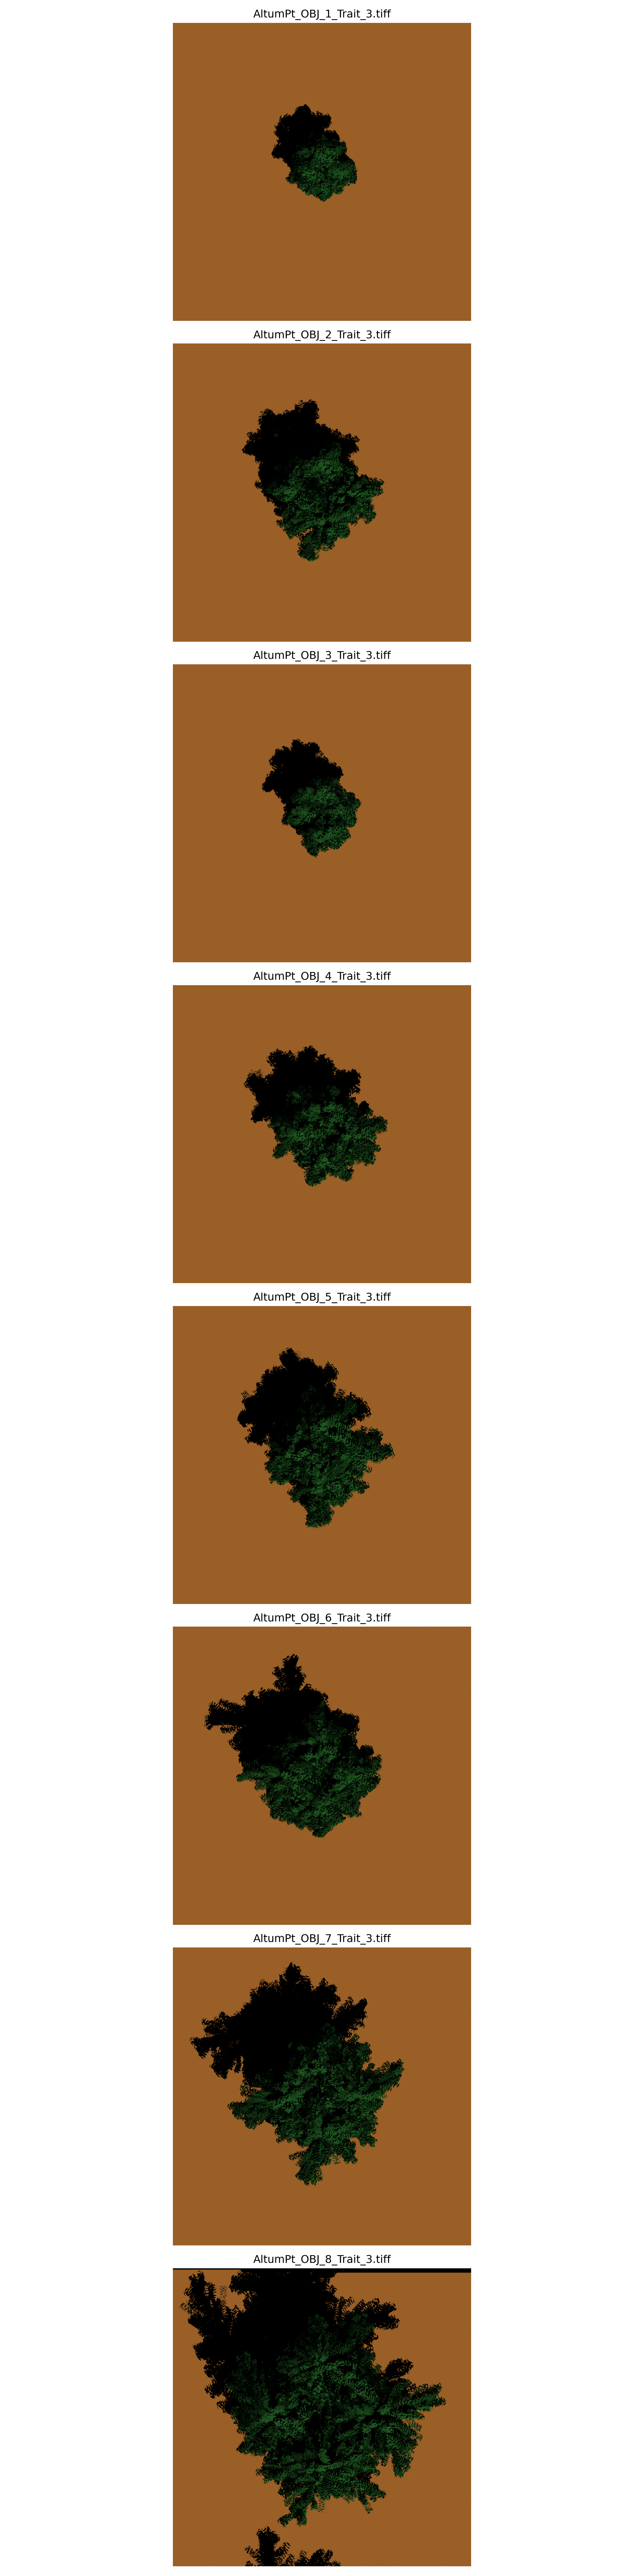

In [38]:
# Define the base directory containing the TIFF files for each object
base_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\All_Tiff_Output'

# Collect all the TIFF file paths for Trait_3 in the CHL category
tiff_files = []
for obj_folder in os.listdir(base_dir):
    chl_path = os.path.join(base_dir, obj_folder, 'CHL')
    if os.path.isdir(chl_path):
        for file in os.listdir(chl_path):
            if 'Trait_3.tiff' in file:
                tiff_files.append(os.path.join(chl_path, file))

# Plotting
fig, axes = plt.subplots(nrows=len(tiff_files), ncols=1, figsize=(10, 5 * len(tiff_files)))
if len(tiff_files) == 1:
    axes = [axes]  # Make axes iterable if there's only one image

brightness_factor = 2.5  # Adjust this value to control brightness

for ax, tiff_file in zip(axes, tiff_files):
    with rasterio.open(tiff_file) as src:
        # Read the bands; assuming the order: Blue, Green, Red
        blue = src.read(3)
        green = src.read(2)
        red = src.read(1)

        # Handle NaNs or infinite values
        blue = np.nan_to_num(blue)
        green = np.nan_to_num(green)
        red = np.nan_to_num(red)

        # Scale reflectance to [0, 255] and apply brightness factor
        blue = np.clip((blue * 255 * brightness_factor), 0, 255).astype(np.uint8)
        green = np.clip((green * 255 * brightness_factor), 0, 255).astype(np.uint8)
        red = np.clip((red * 255 * brightness_factor), 0, 255).astype(np.uint8)

        # Stack bands for RGB
        rgb = np.dstack((blue, green, red))

        # Display the image
        ax.imshow(rgb)
        ax.set_title(os.path.basename(tiff_file))
        ax.axis('off')

plt.tight_layout()
plt.show()

------------------------------------------
## Visualizing NDVI x EGI Alongside RGB Images

The script provided facilitates the comparison between standard RGB visualizations and NDVI x EGI calculations for hyperspectral images. Each object's trait data is processed to highlight both natural color perception and enhanced vegetative indices.

### Process Overview:

1. **Data Collection**: The script gathers all relevant TIFF files from a specified directory, focusing specifically on files that correspond to 'Trait_3' within the 'CHL' category of each object's dataset.

2. **Image Processing and Visualization**:
    - For each image file, RGB bands are scaled and adjusted for brightness to enhance visual clarity. This visualization aids in the straightforward interpretation of natural color imagery.
    - NDVI (Normalized Difference Vegetation Index) and EGI (Excess Green Index) are computed to produce an NDVI x EGI composite image. This composite serves to emphasize areas of dense vegetation and physiological differences among the observed subjects, which are particularly useful in agricultural and ecological studies.

3. **Brightness Adjustment**: A brightness factor is applied exclusively to the RGB images to prevent the oversaturation of scientific calculations such as NDVI and EGI, ensuring that these indices remain true to their intended measurements.

4. **Display Configuration**:
    - Each image file's RGB and NDVI x EGI images are plotted side by side for comparative analysis.
    - A color map ('RdYlGn') is applied to the NDVI x EGI images to differentiate between high and low vegetation density visually.

5. **Normalization and Color Scaling**:
    - NDVI x EGI values are normalized to a 0-1 range to fit the color mapping scale effectively, facilitating easier interpretation of vegetation health and density.

6. **Layout Adjustments**:
    - Subplots are tightly arranged with no horizontal space between them, maximizing the use of space and improving the overall readability of the visual output.

This approach not only highlights the practical applications of hyperspectral imaging in monitoring vegetation health but also demonstrates how different spectral indices can be visually contrasted against standard RGB outputs to provide a deeper understanding of the observed areas.

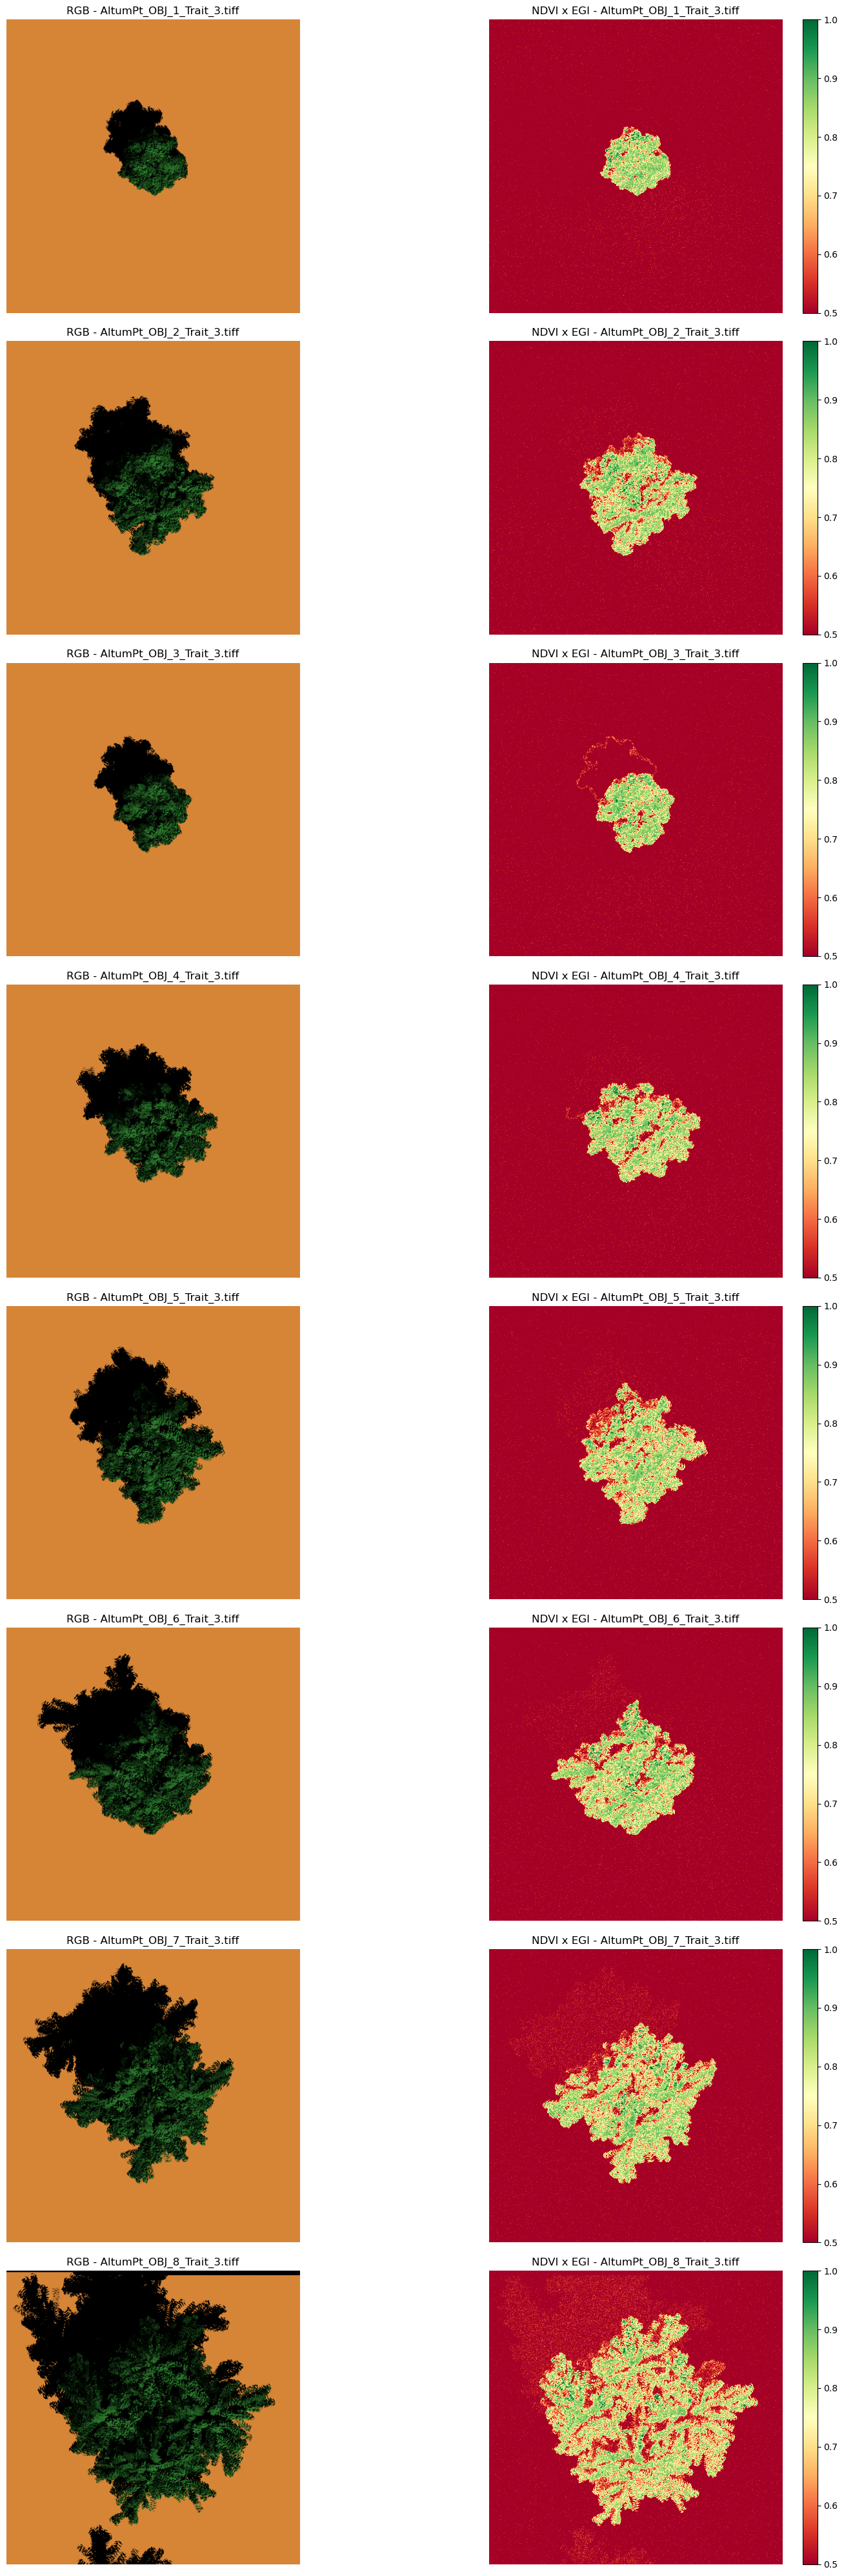

In [79]:
# Define the base directory containing the TIFF files for each object
base_dir = r'C:\Users\15302\DART_5-10-2_2024-04-30\user_data\simulations\Avocado_Sequence\All_Tiff_Output'

# Collect all the TIFF file paths for Trait_3 in the CHL category
tiff_files = []
for obj_folder in os.listdir(base_dir):
    chl_path = os.path.join(base_dir, obj_folder, 'CHL')
    if os.path.isdir(chl_path):
        for file in os.listdir(chl_path):
            if 'Trait_3.tiff' in file:
                tiff_files.append(os.path.join(chl_path, file))

# Plotting
fig, axes = plt.subplots(nrows=len(tiff_files), ncols=2, figsize=(15, 5 * len(tiff_files)))  # Reduced vertical space per subplot
if len(tiff_files) == 1:
    axes = np.array([axes])  # Make axes iterable if there's only one image

brightness_factor = 3.5  # Adjust this value to control brightness for RGB images only

for row, tiff_file in zip(axes, tiff_files):
    with rasterio.open(tiff_file) as src:
        # Read the bands; assuming the order: Blue (Band 3), Green (Band 2), Red (Band 1), NIR (Band 5)
        blue = src.read(3)
        green = src.read(2)
        red = src.read(1)
        nir = src.read(5)

        # Handle NaNs or infinite values
        blue = np.nan_to_num(blue)
        green = np.nan_to_num(green)
        red = np.nan_to_num(red)
        nir = np.nan_to_num(nir)

        # Scale reflectance to [0, 255] for RGB visualization and apply brightness factor
        blue_scaled = np.clip((blue * 255 * brightness_factor), 0, 255).astype(np.uint8)
        green_scaled = np.clip((green * 255 * brightness_factor), 0, 255).astype(np.uint8)
        red_scaled = np.clip((red * 255 * brightness_factor), 0, 255).astype(np.uint8)

        # Stack bands for RGB
        rgb = np.dstack((blue_scaled, green_scaled, red_scaled))

        # Display the RGB image
        row[0].imshow(rgb)
        row[0].set_title(f'RGB - {os.path.basename(tiff_file)}')
        row[0].axis('off')
        
        # Scale reflectance to [0, 255]
        blue = np.clip((blue * 255), 0, 255).astype(np.uint8)
        green = np.clip((green * 255), 0, 255).astype(np.uint8)
        red = np.clip((red * 255), 0, 255).astype(np.uint8)
        nir = np.clip((nir * 255), 0, 255).astype(np.uint8)

        # Calculate NDVI
        ndvi = (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

        # Calculate EGI
        egi = (2 * green - red - blue) / (red + green + blue + 1e-10)  # Avoid division by zero

        # Calculate NDVI x EGI
        ndvi_x_egi = ndvi * egi

        # Normalize the NDVI x EGI for display
        ndvi_x_egi_normalized = np.clip((ndvi_x_egi + 1) / 2, 0, 1)  # Scale to 0-1 range for display

        # Display the NDVI x EGI image
        im = row[1].imshow(ndvi_x_egi_normalized, cmap='RdYlGn')
        row[1].set_title(f'NDVI x EGI - {os.path.basename(tiff_file)}')
        row[1].axis('off')

        # Add a colorbar
        fig.colorbar(im, ax=row[1], fraction=0.046, pad=0.04)

plt.subplots_adjust(hspace=0)  # Set hspace to 0 to remove vertical spacing
plt.tight_layout()
plt.show()